# CNN Layers Visualistaion

CNN apparently does magic in image classification, localisation and segmentation. This small CNN application for image classification explains how each of the CNN layers learns fatures of image for each layers. It will help us to understand CNN better way and we will be able to design the network in more effificent way.

In [2]:
import numpy as np
import scipy
import os
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,regularizers
from keras.preprocessing .image import ImageDataGenerator
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from matplotlib import pyplot as plt   
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import load_model
from keras import regularizers
import cv2
#FinalModel.add(modelNew)
from keras import regularizers
from keras import layers
from keras.callbacks import *
from keras import applications
import sys
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions

Our training and validation directories will have following structure. Inspiration for this notebook comes from this [Keras blog post](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) and the VGG ConvNet paper.
There are training and test directories and have their corresponding directories as per image class categories. we will use two sets of pictures, which we got from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data): 1000 cats and 1000 dogs (although the original dataset had 12,500 cats and 12,500 dogs, we just took the first 1000 images for each class). We will also use 400 additional samples from each class as validation data, to evaluate our model performance.
This is quite common in real-time world where we don't get too many data and hence we need to ensure our model is well trained with such minimal data.

We will first define the training and testing directory path and store all the images names of categories into their resoective arrasy.

In [4]:
ROOT_DIR = os.path.abspath("../")
print(ROOT_DIR)
TRAIN_DIR = '../input/train/'
TRAIN_DIR_DOG = '../input/train/dogs'
TRAIN_DIR_CATS = '../input/train/cats'
VALIRDATION_DI = '../input/validation/'

TEST_DIR = '../input/test/'

print("Path Is:",TRAIN_DIR)

#sys.path.append(os.path.join(ROOT_DIR, EXTENSION_PATH))  # To find local version

train_dogs =   [TRAIN_DIR_DOG+inputD for inputD in os.listdir(TRAIN_DIR_DOG) if 'dog' in inputD]
train_cats =   [TRAIN_DIR_CATS+inputC for inputC in os.listdir(TRAIN_DIR_CATS) if 'cat' in inputC]
test_images =  [TEST_DIR+inputT for inputT in os.listdir(TEST_DIR) ]


print("No of Training Images of Dog:",len(train_dogs))
print("No of Training Images of Cats:",len(train_cats))
print("No of Test Images:",len(test_images))

C:\Users\akayal\Devapps
Path Is: ../input/train/
No of Training Images of Dog: 11252
No of Training Images of Cats: 11733
No of Test Images: 12500


We will now do basic preprocessing now as part of data loading. Data will be first resized and then will be normalised.

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. Some of these capabailities are:

- Sample-wise standardization.
- Feature-wise standardization.
- ZCA whitening.
- Random rotation, shifts, shear and flips.
- Dimension reordering.
- Save augmented images to disk.

Our next step will be to read the test and training images. Remember that training data are labelled ones and test data as usual does not have labelled ones.

In [5]:
image_height = 150
image_width= 150

In [6]:

# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)
  

In [7]:
MyModel = load_model("cats_and_dogs_small_1.h5")
MyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 37, 37, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
__________

## ConvNet Layers Visualisation

We will extract all the layers of our models and also count no of layers.

In [8]:
NoOflayer = len(MyModel.layers)

print("No of Layer is",NoOflayer)
layer_outputs = [layer.output for layer in MyModel.layers[:NoOflayer]]


No of Layer is 24


Creates a model that will return these outputs, given the model input

In [9]:
from keras import models
activation_model = models.Model(inputs=MyModel.input, outputs=layer_outputs)

../input/train/cats
../input/train/cats/cat.769.jpg
Shape of the Image before: (1, 150, 150, 3)


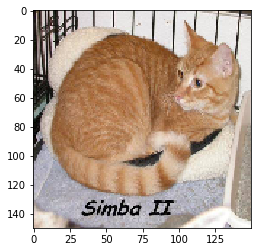

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of the Image after: (1, 150, 150, 3)


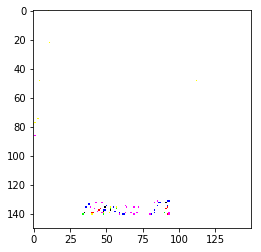

Shape of the Image after is: (1, 150, 150, 3)


In [66]:
print(TRAIN_DIR_CATS)
ImageName = TRAIN_DIR_CATS + "/cat.769.jpg"
print(ImageName)
TestImage = image.load_img(ImageName,target_size= (image_width,image_height,3))
Image = image.load_img(ImageName,target_size= (image_width,image_height,3))
print("Shape of the Image before:",TestImageConv.shape)

plt.imshow(TestImage)
plt.show()

print("Shape of the Image after:",TestImageConv.shape)

TestImageConv = image.img_to_array(TestImage)
plt.imshow(TestImageConv)


TestImageConv = np.expand_dims(TestImageConv, axis=0)
ImageCnv=np.expand_dims(Image, axis=0)
plt.show()
TestImageConv /= 255.
print("Shape of the Image after is:",TestImageConv.shape)


In [38]:
activations = MyModel.predict(TestImageConv)
print(activations)

activation_model = models.Model(inputs=MyModel.input, outputs=layer_outputs)
print("Probability:", activation_model)

y_classes = activations.argmax(axis=-1)
print("Class:", y_classes)


[[0.66304517]]
Probability: <keras.engine.training.Model object at 0x0000021332FC29B0>
Class: [0]


In [39]:
activations = activation_model.predict(TestImageConv)

first_layer_activation = activations[0]
print(first_layer_activation.shape)
print(len(first_layer_activation.shape))


(1, 150, 150, 32)
4


In [40]:
def showlayerVisualistaion(LayerNo,ChannelNo):
    #layer_activation = activations[LayerNo]
    layer_activation = activations[LayerNo]
    shape = len(layer_activation.shape)
    
    if shape == 4:
        #NoOfFilter = layer_activation[3]
        print("Feature Map Size:",layer_activation.shape,"for Layer:",LayerNo, "with shape:",shape)
        print("Displaying Visalusation of Layer:",LayerNo, "and Channel No:",ChannelNo)
        plt.matshow(layer_activation[0, :, :, ChannelNo], cmap='viridis')   
        plt.show()
        ChannelNo +=1
        print("Displaying Visalusation of Layer:",LayerNo, "and Channel No:",ChannelNo)
        plt.matshow(layer_activation[0, :, :, ChannelNo], cmap='viridis')   
        plt.show()
        ChannelNo +=1
        print("Displaying Visalusation of Layer:",LayerNo, "and Channel No:",ChannelNo)
        plt.matshow(layer_activation[0, :, :, ChannelNo], cmap='viridis')   
        plt.show()
        ChannelNo +=1
        print("Displaying Visalusation of Layer:",LayerNo, "and Channel No:",ChannelNo)
        plt.matshow(layer_activation[0, :, :, ChannelNo], cmap='viridis')   
        plt.show()
    else:
        print("Feature Map Size:",layer_activation.shape,"for Layer:",LayerNo)
        print("Displaying Visalusation of Dense Layer:",LayerNo, "and Channel No:",ChannelNo)    


Visualiation of layers shows that first layer almost retains all the features of the input image and and as we go deeper, it starts leanring edges, corners etc.Features extracted by a layer become increasingly abstract with the depth of the layer. The activations of higher layers carry less and less information about the specific input being seen, and more and more information about the target.

Layer Visualisation for first three channels
Layer Name: conv2d_1 Layer No: 0
Feature Map Size: (1, 150, 150, 32) for Layer: 0 with shape: 4
Displaying Visalusation of Layer: 0 and Channel No: 1


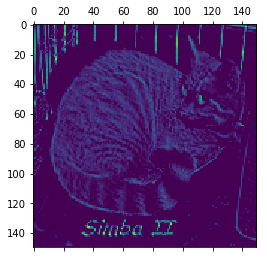

Displaying Visalusation of Layer: 0 and Channel No: 2


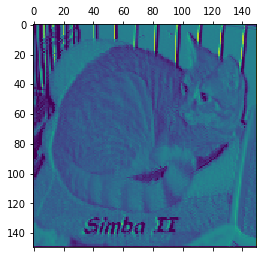

Displaying Visalusation of Layer: 0 and Channel No: 3


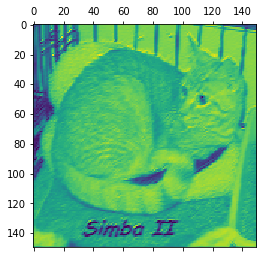

Displaying Visalusation of Layer: 0 and Channel No: 4


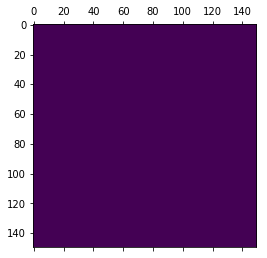

Layer Name: batch_normalization_1 Layer No: 1
Feature Map Size: (1, 150, 150, 32) for Layer: 1 with shape: 4
Displaying Visalusation of Layer: 1 and Channel No: 1


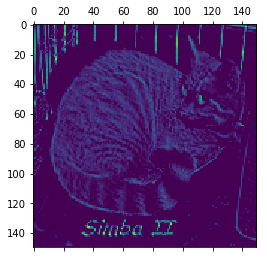

Displaying Visalusation of Layer: 1 and Channel No: 2


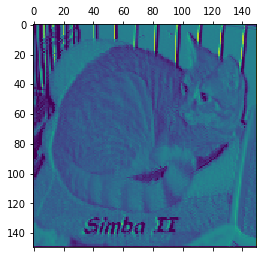

Displaying Visalusation of Layer: 1 and Channel No: 3


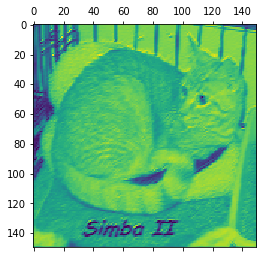

Displaying Visalusation of Layer: 1 and Channel No: 4


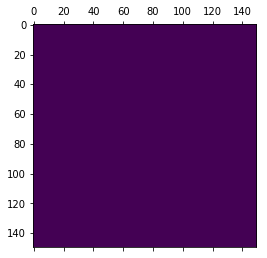

Layer Name: max_pooling2d_1 Layer No: 2
Feature Map Size: (1, 37, 37, 32) for Layer: 2 with shape: 4
Displaying Visalusation of Layer: 2 and Channel No: 1


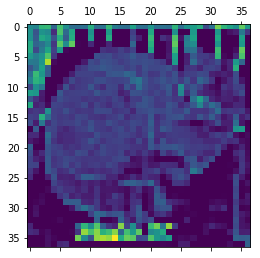

Displaying Visalusation of Layer: 2 and Channel No: 2


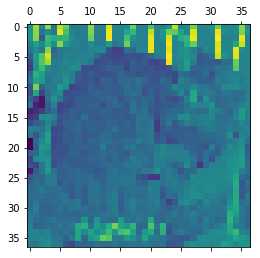

Displaying Visalusation of Layer: 2 and Channel No: 3


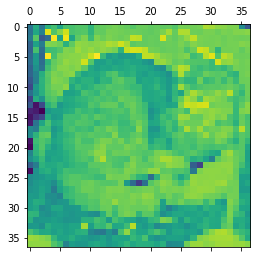

Displaying Visalusation of Layer: 2 and Channel No: 4


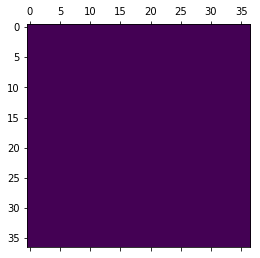

Layer Name: dropout_1 Layer No: 3
Feature Map Size: (1, 37, 37, 32) for Layer: 3 with shape: 4
Displaying Visalusation of Layer: 3 and Channel No: 1


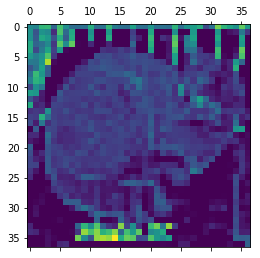

Displaying Visalusation of Layer: 3 and Channel No: 2


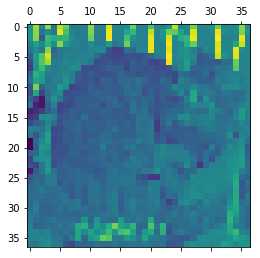

Displaying Visalusation of Layer: 3 and Channel No: 3


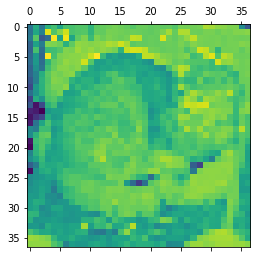

Displaying Visalusation of Layer: 3 and Channel No: 4


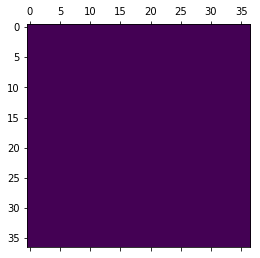

Layer Name: conv2d_2 Layer No: 4
Feature Map Size: (1, 37, 37, 64) for Layer: 4 with shape: 4
Displaying Visalusation of Layer: 4 and Channel No: 1


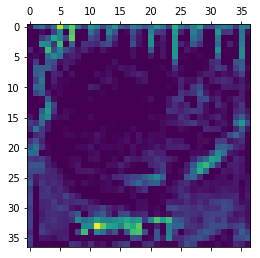

Displaying Visalusation of Layer: 4 and Channel No: 2


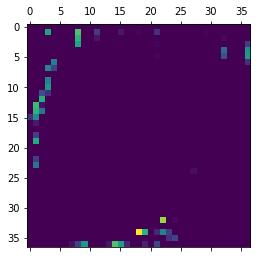

Displaying Visalusation of Layer: 4 and Channel No: 3


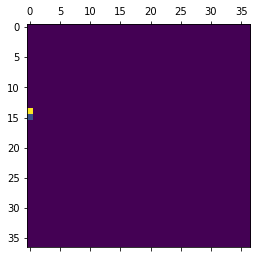

Displaying Visalusation of Layer: 4 and Channel No: 4


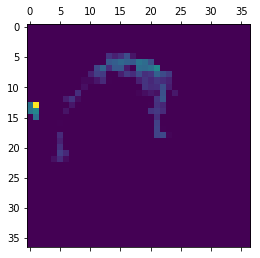

Layer Name: batch_normalization_2 Layer No: 5
Feature Map Size: (1, 37, 37, 64) for Layer: 5 with shape: 4
Displaying Visalusation of Layer: 5 and Channel No: 1


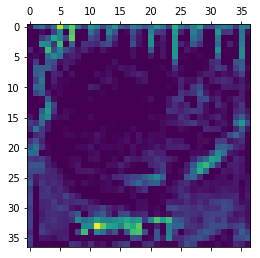

Displaying Visalusation of Layer: 5 and Channel No: 2


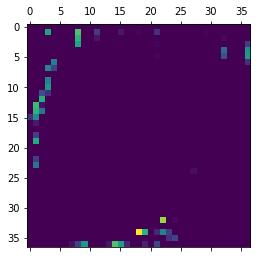

Displaying Visalusation of Layer: 5 and Channel No: 3


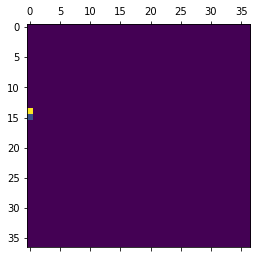

Displaying Visalusation of Layer: 5 and Channel No: 4


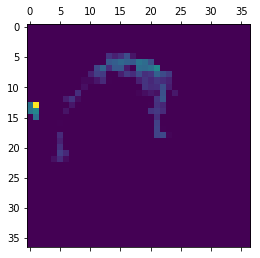

Layer Name: max_pooling2d_2 Layer No: 6
Feature Map Size: (1, 18, 18, 64) for Layer: 6 with shape: 4
Displaying Visalusation of Layer: 6 and Channel No: 1


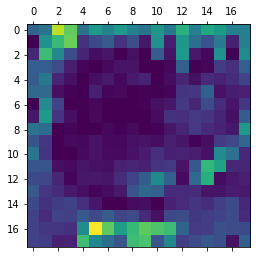

Displaying Visalusation of Layer: 6 and Channel No: 2


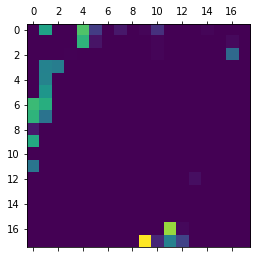

Displaying Visalusation of Layer: 6 and Channel No: 3


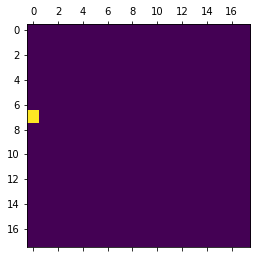

Displaying Visalusation of Layer: 6 and Channel No: 4


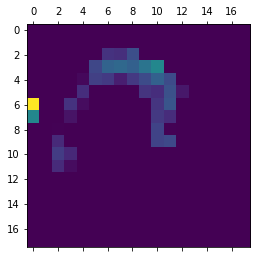

Layer Name: dropout_2 Layer No: 7
Feature Map Size: (1, 18, 18, 64) for Layer: 7 with shape: 4
Displaying Visalusation of Layer: 7 and Channel No: 1


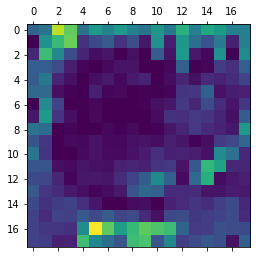

Displaying Visalusation of Layer: 7 and Channel No: 2


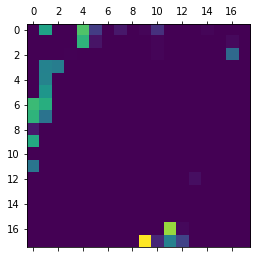

Displaying Visalusation of Layer: 7 and Channel No: 3


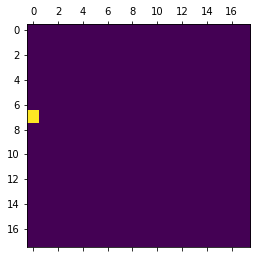

Displaying Visalusation of Layer: 7 and Channel No: 4


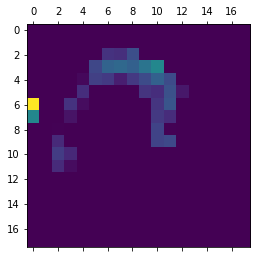

Layer Name: conv2d_3 Layer No: 8
Feature Map Size: (1, 16, 16, 128) for Layer: 8 with shape: 4
Displaying Visalusation of Layer: 8 and Channel No: 1


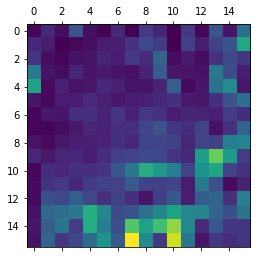

Displaying Visalusation of Layer: 8 and Channel No: 2


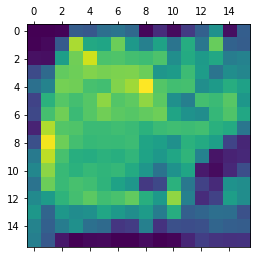

Displaying Visalusation of Layer: 8 and Channel No: 3


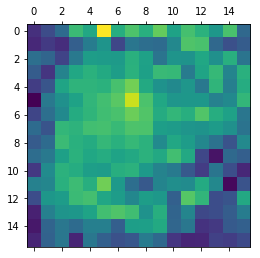

Displaying Visalusation of Layer: 8 and Channel No: 4


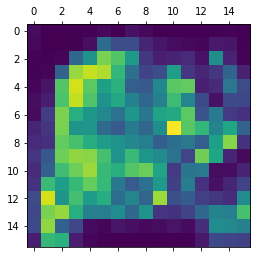

Layer Name: batch_normalization_3 Layer No: 9
Feature Map Size: (1, 16, 16, 128) for Layer: 9 with shape: 4
Displaying Visalusation of Layer: 9 and Channel No: 1


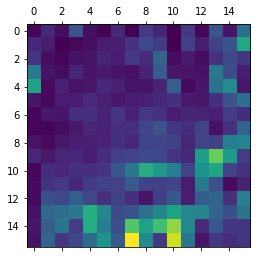

Displaying Visalusation of Layer: 9 and Channel No: 2


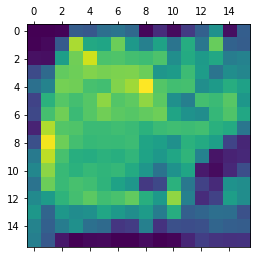

Displaying Visalusation of Layer: 9 and Channel No: 3


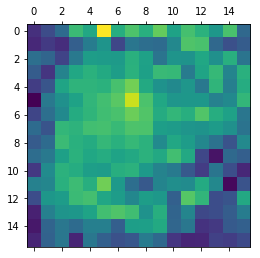

Displaying Visalusation of Layer: 9 and Channel No: 4


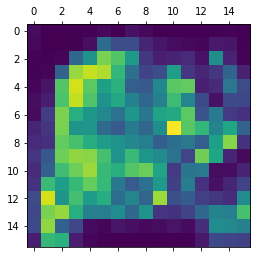

Layer Name: max_pooling2d_3 Layer No: 10
Feature Map Size: (1, 8, 8, 128) for Layer: 10 with shape: 4
Displaying Visalusation of Layer: 10 and Channel No: 1


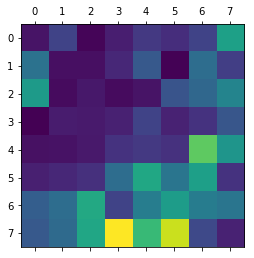

Displaying Visalusation of Layer: 10 and Channel No: 2


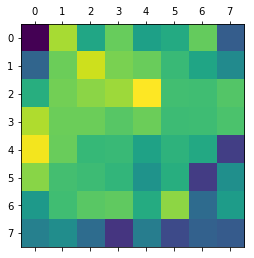

Displaying Visalusation of Layer: 10 and Channel No: 3


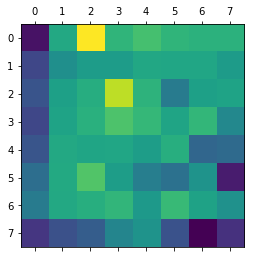

Displaying Visalusation of Layer: 10 and Channel No: 4


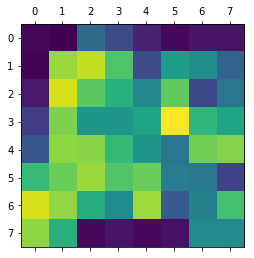

Layer Name: dropout_3 Layer No: 11
Feature Map Size: (1, 8, 8, 128) for Layer: 11 with shape: 4
Displaying Visalusation of Layer: 11 and Channel No: 1


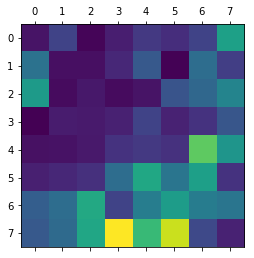

Displaying Visalusation of Layer: 11 and Channel No: 2


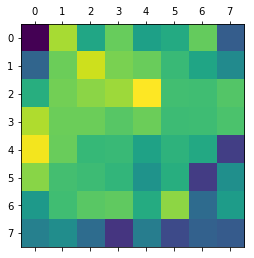

Displaying Visalusation of Layer: 11 and Channel No: 3


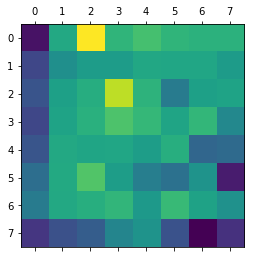

Displaying Visalusation of Layer: 11 and Channel No: 4


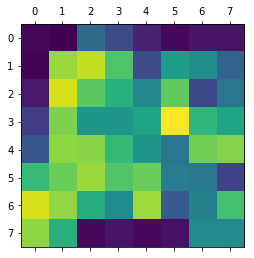

Layer Name: conv2d_4 Layer No: 12
Feature Map Size: (1, 6, 6, 256) for Layer: 12 with shape: 4
Displaying Visalusation of Layer: 12 and Channel No: 1


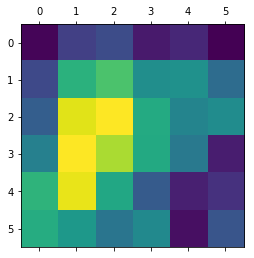

Displaying Visalusation of Layer: 12 and Channel No: 2


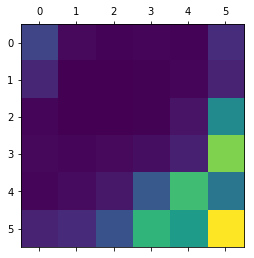

Displaying Visalusation of Layer: 12 and Channel No: 3


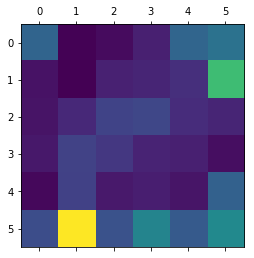

Displaying Visalusation of Layer: 12 and Channel No: 4


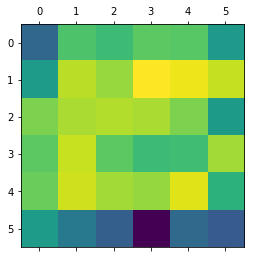

Layer Name: batch_normalization_4 Layer No: 13
Feature Map Size: (1, 6, 6, 256) for Layer: 13 with shape: 4
Displaying Visalusation of Layer: 13 and Channel No: 1


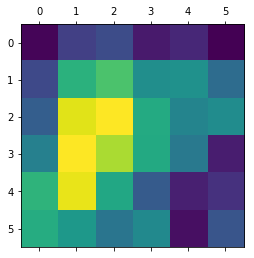

Displaying Visalusation of Layer: 13 and Channel No: 2


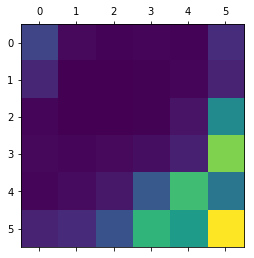

Displaying Visalusation of Layer: 13 and Channel No: 3


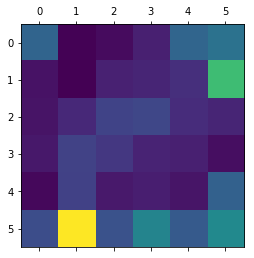

Displaying Visalusation of Layer: 13 and Channel No: 4


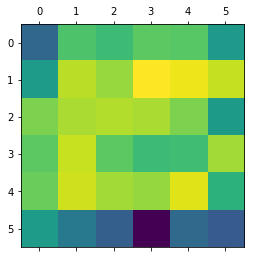

Layer Name: max_pooling2d_4 Layer No: 14
Feature Map Size: (1, 3, 3, 256) for Layer: 14 with shape: 4
Displaying Visalusation of Layer: 14 and Channel No: 1


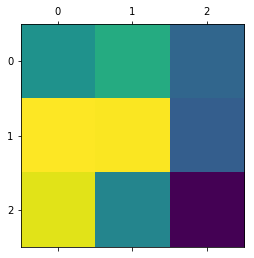

Displaying Visalusation of Layer: 14 and Channel No: 2


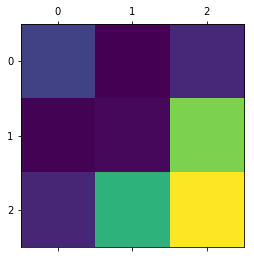

Displaying Visalusation of Layer: 14 and Channel No: 3


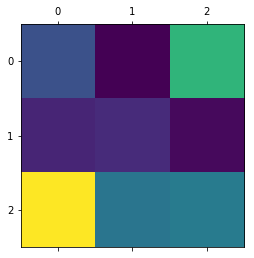

Displaying Visalusation of Layer: 14 and Channel No: 4


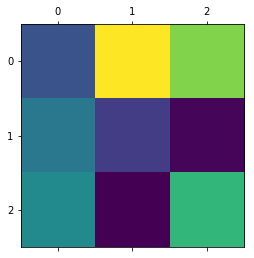

Layer Name: dropout_4 Layer No: 15
Feature Map Size: (1, 3, 3, 256) for Layer: 15 with shape: 4
Displaying Visalusation of Layer: 15 and Channel No: 1


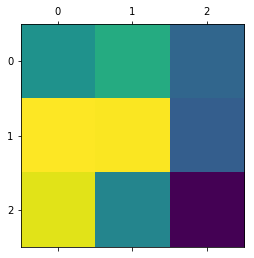

Displaying Visalusation of Layer: 15 and Channel No: 2


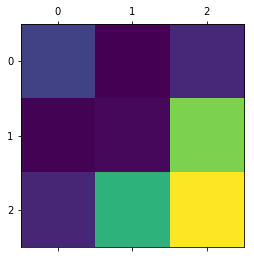

Displaying Visalusation of Layer: 15 and Channel No: 3


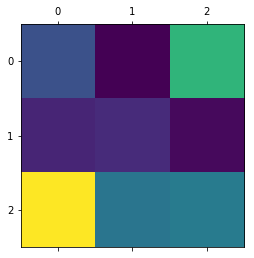

Displaying Visalusation of Layer: 15 and Channel No: 4


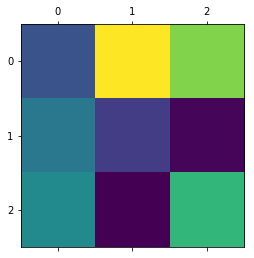

Layer Name: conv2d_5 Layer No: 16
Feature Map Size: (1, 3, 3, 64) for Layer: 16 with shape: 4
Displaying Visalusation of Layer: 16 and Channel No: 1


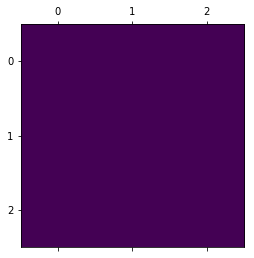

Displaying Visalusation of Layer: 16 and Channel No: 2


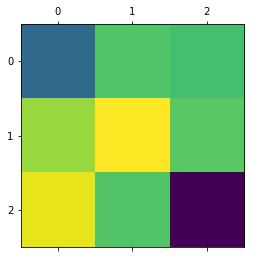

Displaying Visalusation of Layer: 16 and Channel No: 3


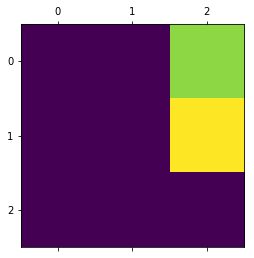

Displaying Visalusation of Layer: 16 and Channel No: 4


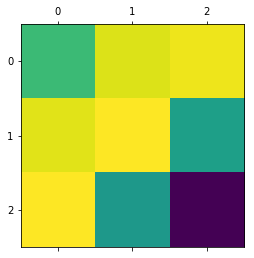

Layer Name: batch_normalization_5 Layer No: 17
Feature Map Size: (1, 3, 3, 64) for Layer: 17 with shape: 4
Displaying Visalusation of Layer: 17 and Channel No: 1


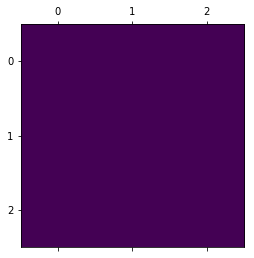

Displaying Visalusation of Layer: 17 and Channel No: 2


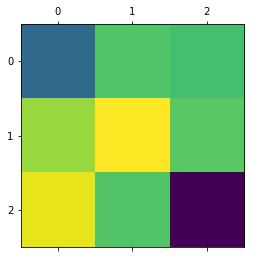

Displaying Visalusation of Layer: 17 and Channel No: 3


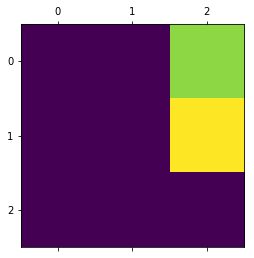

Displaying Visalusation of Layer: 17 and Channel No: 4


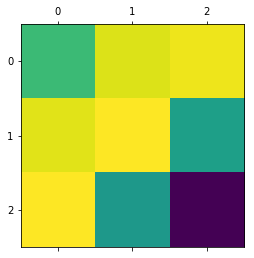

Layer Name: max_pooling2d_5 Layer No: 18
Feature Map Size: (1, 1, 1, 64) for Layer: 18 with shape: 4
Displaying Visalusation of Layer: 18 and Channel No: 1


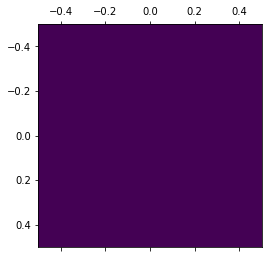

Displaying Visalusation of Layer: 18 and Channel No: 2


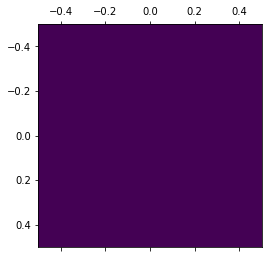

Displaying Visalusation of Layer: 18 and Channel No: 3


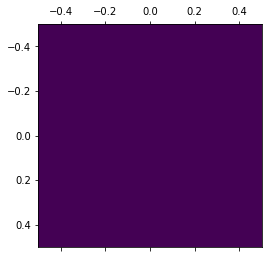

Displaying Visalusation of Layer: 18 and Channel No: 4


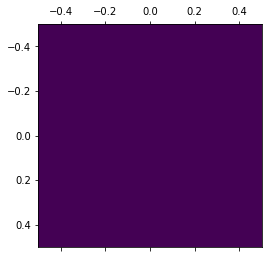

Layer Name: dropout_5 Layer No: 19
Feature Map Size: (1, 1, 1, 64) for Layer: 19 with shape: 4
Displaying Visalusation of Layer: 19 and Channel No: 1


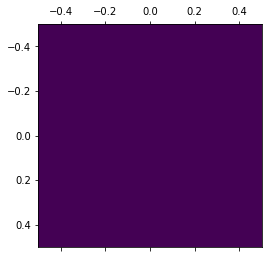

Displaying Visalusation of Layer: 19 and Channel No: 2


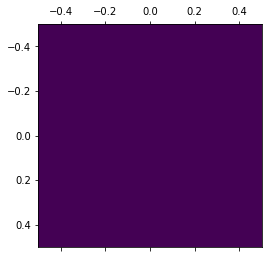

Displaying Visalusation of Layer: 19 and Channel No: 3


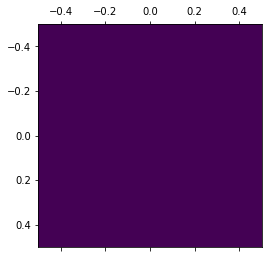

Displaying Visalusation of Layer: 19 and Channel No: 4


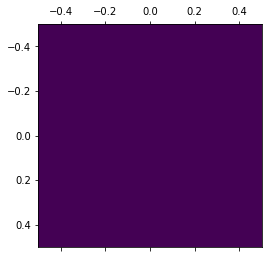

Layer Name: flatten_1 Layer No: 20
Feature Map Size: (1, 64) for Layer: 20
Displaying Visalusation of Dense Layer: 20 and Channel No: 1
Layer Name: dense_1 Layer No: 21
Feature Map Size: (1, 100) for Layer: 21
Displaying Visalusation of Dense Layer: 21 and Channel No: 1
Layer Name: dense_2 Layer No: 22
Feature Map Size: (1, 50) for Layer: 22
Displaying Visalusation of Dense Layer: 22 and Channel No: 1
Layer Name: dense_3 Layer No: 23
Feature Map Size: (1, 1) for Layer: 23
Displaying Visalusation of Dense Layer: 23 and Channel No: 1
Layer Visualisation Completed


In [41]:
print("Layer Visualisation for first three channels")
LayerNo =0
for layer in MyModel.layers:
    print("Layer Name:",layer.name,"Layer No:",LayerNo)
    showlayerVisualistaion(LayerNo,1)
    LayerNo +=1
print("Layer Visualisation Completed")

Lets display visualisation of layers for 7th Channel. Note that channels are not deterministic and hence whatever is learn in this program will not be same for another program of same architecture for same input dataset.
Here this channel seems to be edge detector. Layerwise image shown below how convolution layers are able to extract features efficiently.

Layer Visualisation for Channel 21
Layer Name: conv2d_1 Layer No: 0
Feature Map Size: (1, 150, 150, 32) for Layer: 0 with shape: 4
Displaying Visalusation of Layer: 0 and Channel No: 21


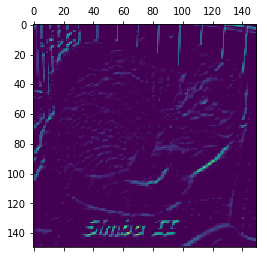

Displaying Visalusation of Layer: 0 and Channel No: 22


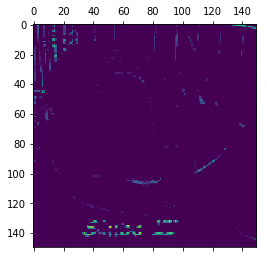

Displaying Visalusation of Layer: 0 and Channel No: 23


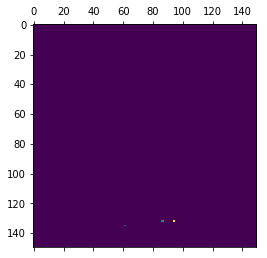

Displaying Visalusation of Layer: 0 and Channel No: 24


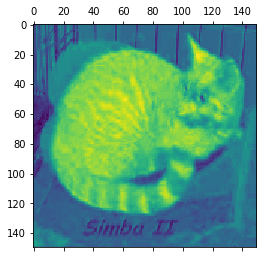

Layer Name: batch_normalization_1 Layer No: 1
Feature Map Size: (1, 150, 150, 32) for Layer: 1 with shape: 4
Displaying Visalusation of Layer: 1 and Channel No: 21


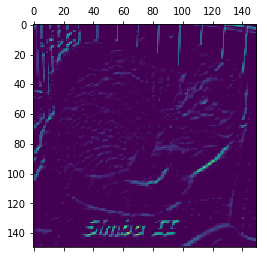

Displaying Visalusation of Layer: 1 and Channel No: 22


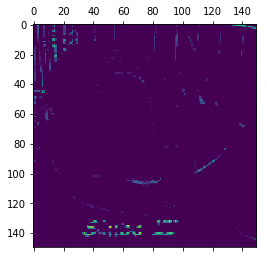

Displaying Visalusation of Layer: 1 and Channel No: 23


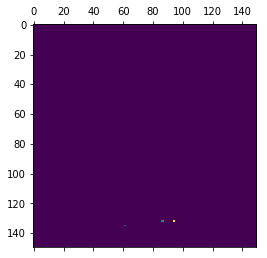

Displaying Visalusation of Layer: 1 and Channel No: 24


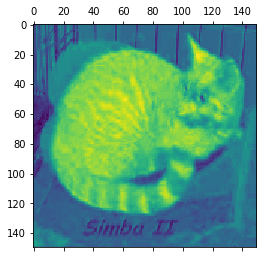

Layer Name: max_pooling2d_1 Layer No: 2
Feature Map Size: (1, 37, 37, 32) for Layer: 2 with shape: 4
Displaying Visalusation of Layer: 2 and Channel No: 21


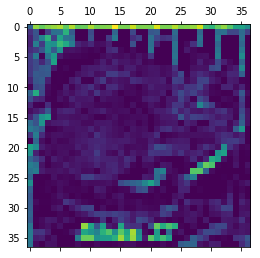

Displaying Visalusation of Layer: 2 and Channel No: 22


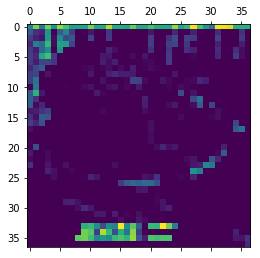

Displaying Visalusation of Layer: 2 and Channel No: 23


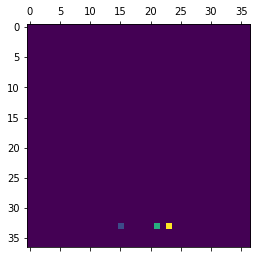

Displaying Visalusation of Layer: 2 and Channel No: 24


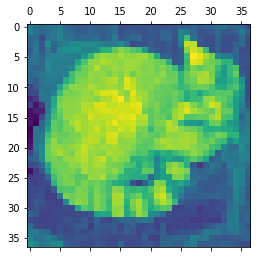

Layer Name: dropout_1 Layer No: 3
Feature Map Size: (1, 37, 37, 32) for Layer: 3 with shape: 4
Displaying Visalusation of Layer: 3 and Channel No: 21


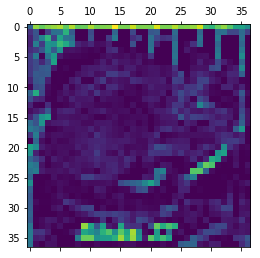

Displaying Visalusation of Layer: 3 and Channel No: 22


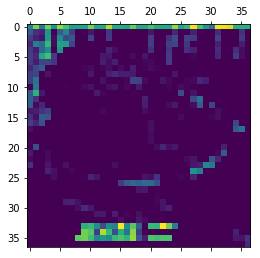

Displaying Visalusation of Layer: 3 and Channel No: 23


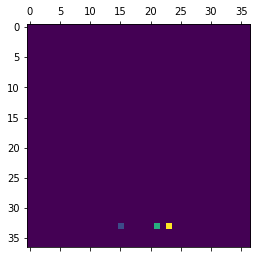

Displaying Visalusation of Layer: 3 and Channel No: 24


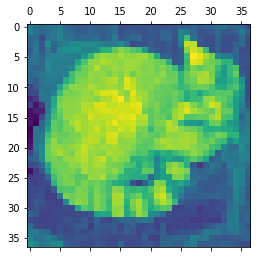

Layer Name: conv2d_2 Layer No: 4
Feature Map Size: (1, 37, 37, 64) for Layer: 4 with shape: 4
Displaying Visalusation of Layer: 4 and Channel No: 21


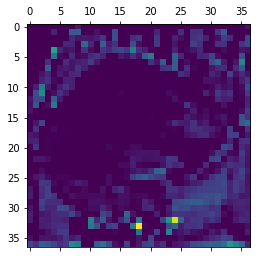

Displaying Visalusation of Layer: 4 and Channel No: 22


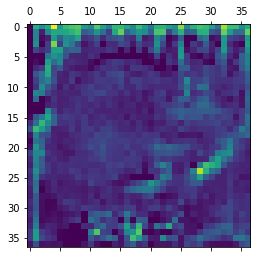

Displaying Visalusation of Layer: 4 and Channel No: 23


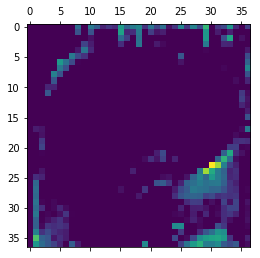

Displaying Visalusation of Layer: 4 and Channel No: 24


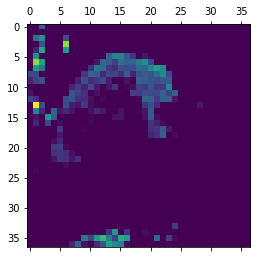

Layer Name: batch_normalization_2 Layer No: 5
Feature Map Size: (1, 37, 37, 64) for Layer: 5 with shape: 4
Displaying Visalusation of Layer: 5 and Channel No: 21


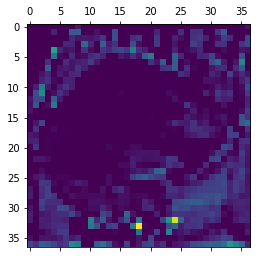

Displaying Visalusation of Layer: 5 and Channel No: 22


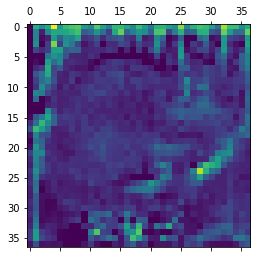

Displaying Visalusation of Layer: 5 and Channel No: 23


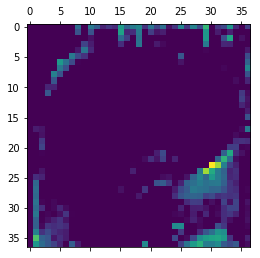

Displaying Visalusation of Layer: 5 and Channel No: 24


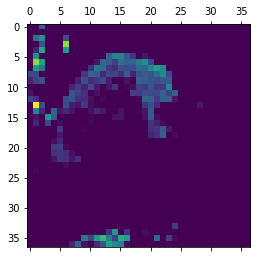

Layer Name: max_pooling2d_2 Layer No: 6
Feature Map Size: (1, 18, 18, 64) for Layer: 6 with shape: 4
Displaying Visalusation of Layer: 6 and Channel No: 21


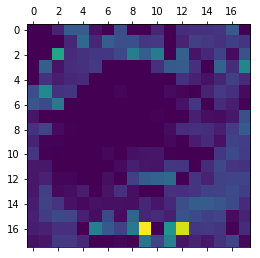

Displaying Visalusation of Layer: 6 and Channel No: 22


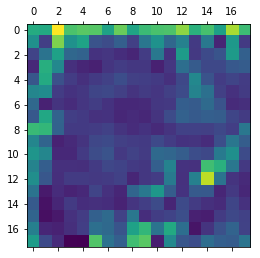

Displaying Visalusation of Layer: 6 and Channel No: 23


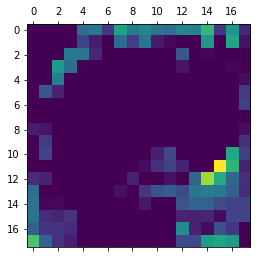

Displaying Visalusation of Layer: 6 and Channel No: 24


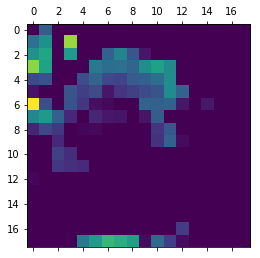

Layer Name: dropout_2 Layer No: 7
Feature Map Size: (1, 18, 18, 64) for Layer: 7 with shape: 4
Displaying Visalusation of Layer: 7 and Channel No: 21


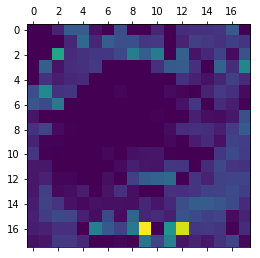

Displaying Visalusation of Layer: 7 and Channel No: 22


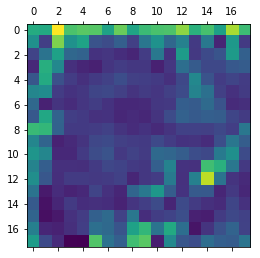

Displaying Visalusation of Layer: 7 and Channel No: 23


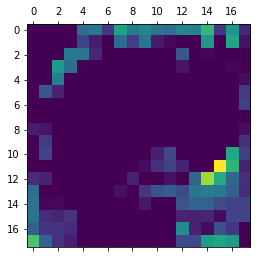

Displaying Visalusation of Layer: 7 and Channel No: 24


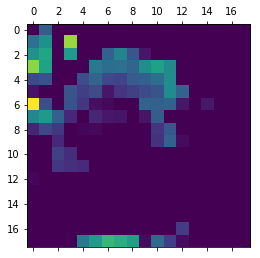

Layer Name: conv2d_3 Layer No: 8
Feature Map Size: (1, 16, 16, 128) for Layer: 8 with shape: 4
Displaying Visalusation of Layer: 8 and Channel No: 21


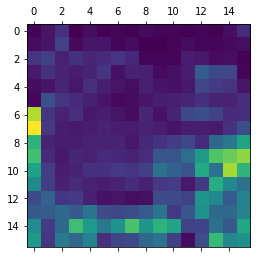

Displaying Visalusation of Layer: 8 and Channel No: 22


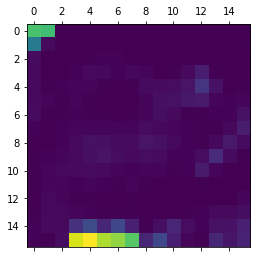

Displaying Visalusation of Layer: 8 and Channel No: 23


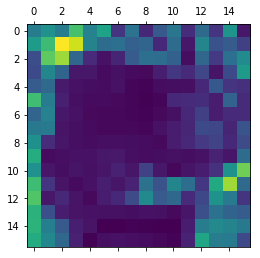

Displaying Visalusation of Layer: 8 and Channel No: 24


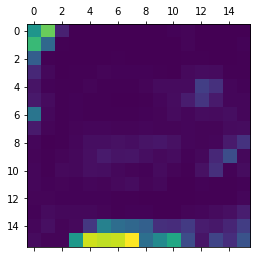

Layer Name: batch_normalization_3 Layer No: 9
Feature Map Size: (1, 16, 16, 128) for Layer: 9 with shape: 4
Displaying Visalusation of Layer: 9 and Channel No: 21


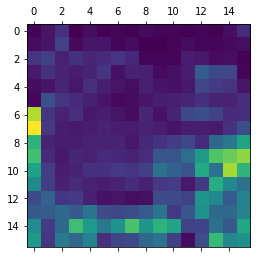

Displaying Visalusation of Layer: 9 and Channel No: 22


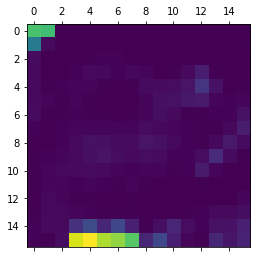

Displaying Visalusation of Layer: 9 and Channel No: 23


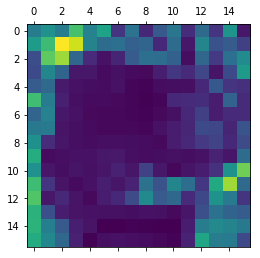

Displaying Visalusation of Layer: 9 and Channel No: 24


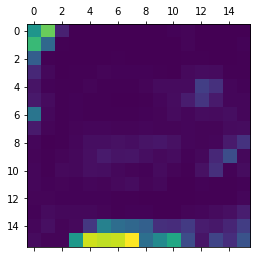

Layer Name: max_pooling2d_3 Layer No: 10
Feature Map Size: (1, 8, 8, 128) for Layer: 10 with shape: 4
Displaying Visalusation of Layer: 10 and Channel No: 21


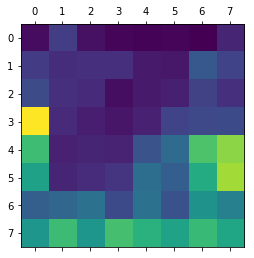

Displaying Visalusation of Layer: 10 and Channel No: 22


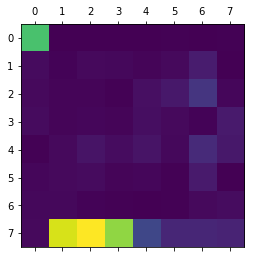

Displaying Visalusation of Layer: 10 and Channel No: 23


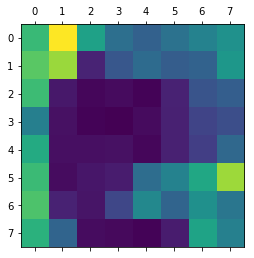

Displaying Visalusation of Layer: 10 and Channel No: 24


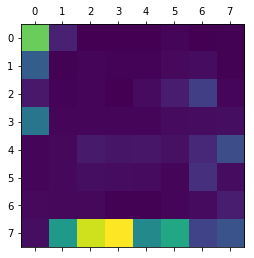

Layer Name: dropout_3 Layer No: 11
Feature Map Size: (1, 8, 8, 128) for Layer: 11 with shape: 4
Displaying Visalusation of Layer: 11 and Channel No: 21


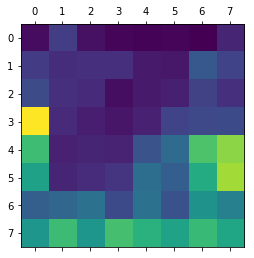

Displaying Visalusation of Layer: 11 and Channel No: 22


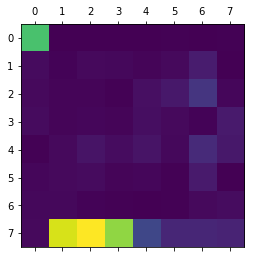

Displaying Visalusation of Layer: 11 and Channel No: 23


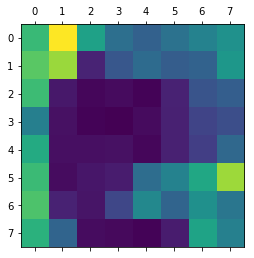

Displaying Visalusation of Layer: 11 and Channel No: 24


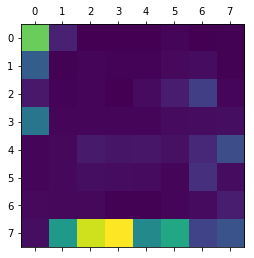

Layer Name: conv2d_4 Layer No: 12
Feature Map Size: (1, 6, 6, 256) for Layer: 12 with shape: 4
Displaying Visalusation of Layer: 12 and Channel No: 21


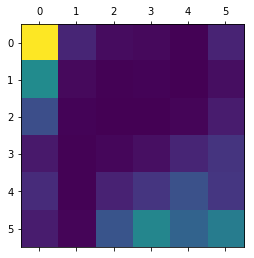

Displaying Visalusation of Layer: 12 and Channel No: 22


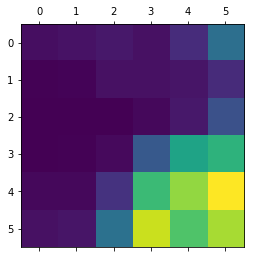

Displaying Visalusation of Layer: 12 and Channel No: 23


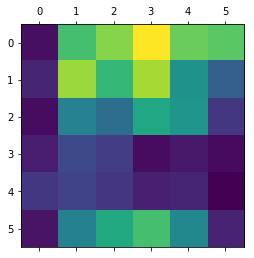

Displaying Visalusation of Layer: 12 and Channel No: 24


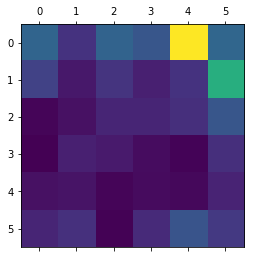

Layer Name: batch_normalization_4 Layer No: 13
Feature Map Size: (1, 6, 6, 256) for Layer: 13 with shape: 4
Displaying Visalusation of Layer: 13 and Channel No: 21


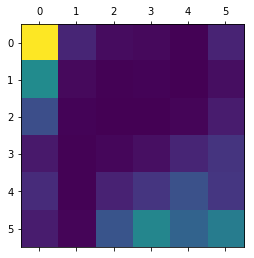

Displaying Visalusation of Layer: 13 and Channel No: 22


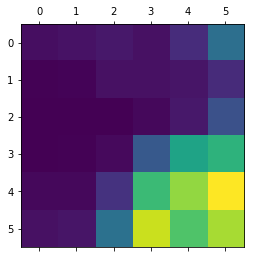

Displaying Visalusation of Layer: 13 and Channel No: 23


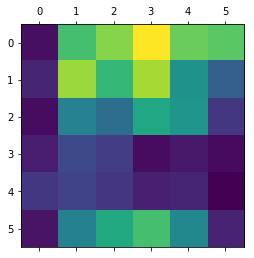

Displaying Visalusation of Layer: 13 and Channel No: 24


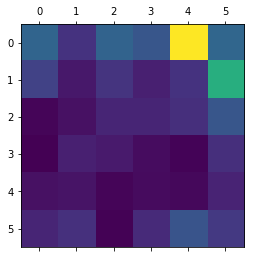

Layer Name: max_pooling2d_4 Layer No: 14
Feature Map Size: (1, 3, 3, 256) for Layer: 14 with shape: 4
Displaying Visalusation of Layer: 14 and Channel No: 21


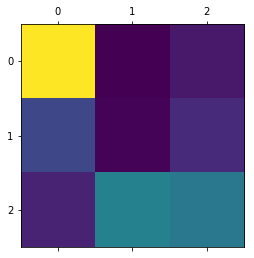

Displaying Visalusation of Layer: 14 and Channel No: 22


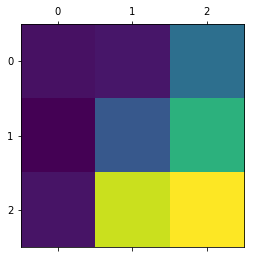

Displaying Visalusation of Layer: 14 and Channel No: 23


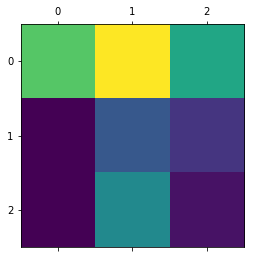

Displaying Visalusation of Layer: 14 and Channel No: 24


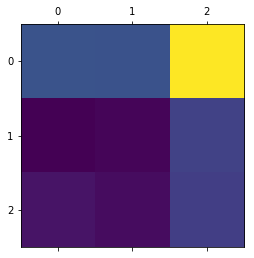

Layer Name: dropout_4 Layer No: 15
Feature Map Size: (1, 3, 3, 256) for Layer: 15 with shape: 4
Displaying Visalusation of Layer: 15 and Channel No: 21


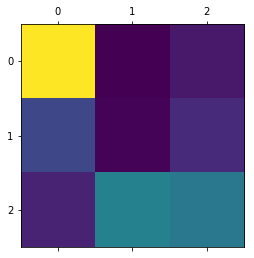

Displaying Visalusation of Layer: 15 and Channel No: 22


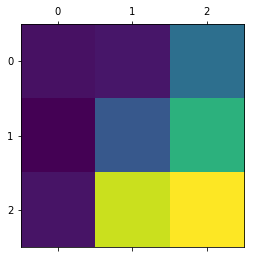

Displaying Visalusation of Layer: 15 and Channel No: 23


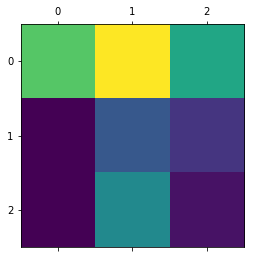

Displaying Visalusation of Layer: 15 and Channel No: 24


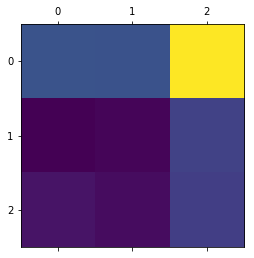

Layer Name: conv2d_5 Layer No: 16
Feature Map Size: (1, 3, 3, 64) for Layer: 16 with shape: 4
Displaying Visalusation of Layer: 16 and Channel No: 21


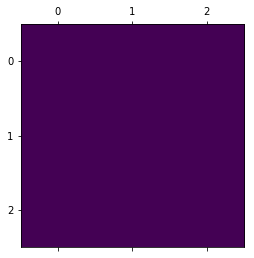

Displaying Visalusation of Layer: 16 and Channel No: 22


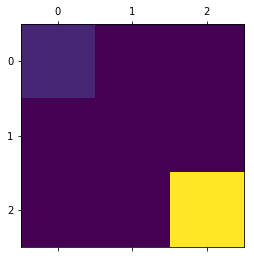

Displaying Visalusation of Layer: 16 and Channel No: 23


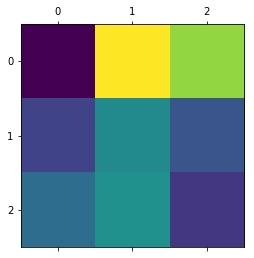

Displaying Visalusation of Layer: 16 and Channel No: 24


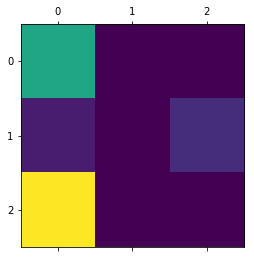

Layer Name: batch_normalization_5 Layer No: 17
Feature Map Size: (1, 3, 3, 64) for Layer: 17 with shape: 4
Displaying Visalusation of Layer: 17 and Channel No: 21


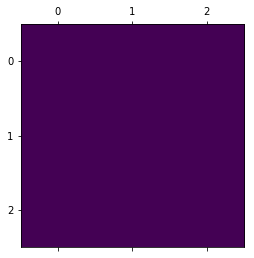

Displaying Visalusation of Layer: 17 and Channel No: 22


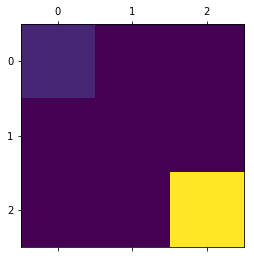

Displaying Visalusation of Layer: 17 and Channel No: 23


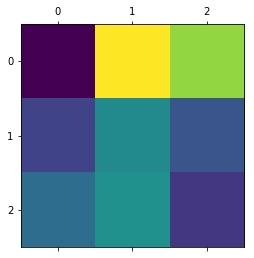

Displaying Visalusation of Layer: 17 and Channel No: 24


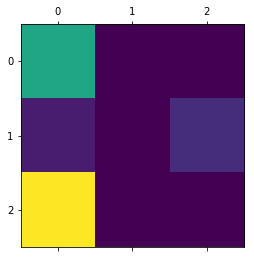

Layer Name: max_pooling2d_5 Layer No: 18
Feature Map Size: (1, 1, 1, 64) for Layer: 18 with shape: 4
Displaying Visalusation of Layer: 18 and Channel No: 21


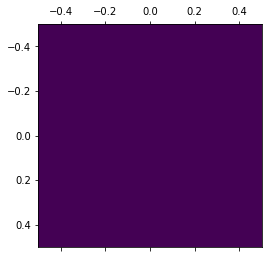

Displaying Visalusation of Layer: 18 and Channel No: 22


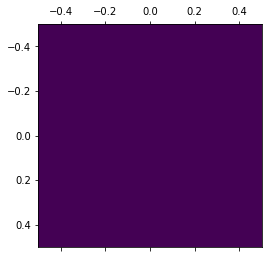

Displaying Visalusation of Layer: 18 and Channel No: 23


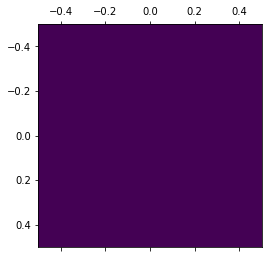

Displaying Visalusation of Layer: 18 and Channel No: 24


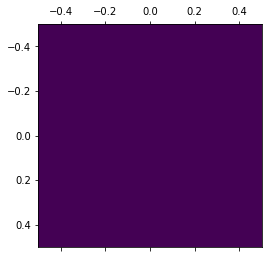

Layer Name: dropout_5 Layer No: 19
Feature Map Size: (1, 1, 1, 64) for Layer: 19 with shape: 4
Displaying Visalusation of Layer: 19 and Channel No: 21


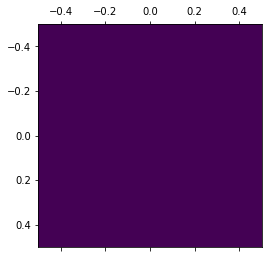

Displaying Visalusation of Layer: 19 and Channel No: 22


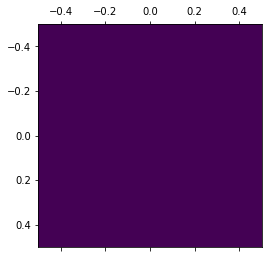

Displaying Visalusation of Layer: 19 and Channel No: 23


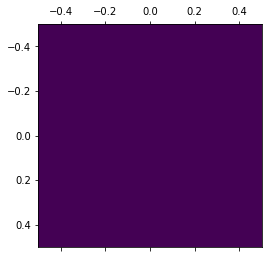

Displaying Visalusation of Layer: 19 and Channel No: 24


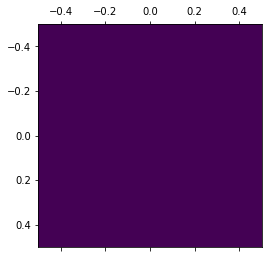

Layer Name: flatten_1 Layer No: 20
Feature Map Size: (1, 64) for Layer: 20
Displaying Visalusation of Dense Layer: 20 and Channel No: 21
Layer Name: dense_1 Layer No: 21
Feature Map Size: (1, 100) for Layer: 21
Displaying Visalusation of Dense Layer: 21 and Channel No: 21
Layer Name: dense_2 Layer No: 22
Feature Map Size: (1, 50) for Layer: 22
Displaying Visalusation of Dense Layer: 22 and Channel No: 21
Layer Name: dense_3 Layer No: 23
Feature Map Size: (1, 1) for Layer: 23
Displaying Visalusation of Dense Layer: 23 and Channel No: 21
Layer Visualisation Completed


In [42]:
print("Layer Visualisation for Channel 21")
LayerNo =0
for layer in MyModel.layers:
    print("Layer Name:",layer.name,"Layer No:",LayerNo)
    showlayerVisualistaion(LayerNo,21)
    LayerNo +=1
print("Layer Visualisation Completed")

# Understanding of classification decision making by convnet

**It is easy for human being to rercognise image class but have we wondered how neural network does the classification?**

Image classificatiin means neural network need to understand specific features of images and then map them with specific class. This means classification error will happen when such feature and class mapping does not happen as per expectation.
This general category of techniques is called class activation map (CAM) visualization,and it consists of producing heatmaps of class activation over input images. CAM visualization allows to generate heatmap for each of class and which will indicate how different parts of images for each of the class.
So we will use method of **Visual Explanations from Deep Networks via Gradient-based Localization** for such heatmap generation and understanding.

We need to understand how gradient works with backpropagation in neural network.It is essential for us to understand [Grad-CAM](https://arxiv.org/abs/1610.02391). GRAD-CAM aim is to produce a coarse localization map of the important regions in the image. ![Grad-CAM](https://pbs.twimg.com/media/DTRSmgHXcAEYask.jpg:large)
CAM helps us to find out what part of the image is critial for class deternmination. While GRAD-CAM further enhances this and can support connecting to FC network and question/answering. Architecture diagram shows that output of CONV layer which is the final feature maps fed through ReLU and then used to generate heatmap. Original torch implementation can be [found](https://github.com/ramprs/grad-cam).
**Lets now understand how NN understand the important part of an image for classification through following excercise**.

Following are the steps to be followed for GRAD-CAM.
- Store the predict value and get the first index element from predict vector
- Get the last conv layer name and extract the output of last conv layer. Output feature map of the last convolution layer is 3,3,64
- Calcualte Gradient of the class(Here it is cat)ass with regard to the output feature map of block5_conv3
- These gradients then flown back through global average pooling to get weights. Here average pooling is used insetd of Max pooling in order to reduce the noise
- Do the average pooling of the gradients to normalise
- Heat map generated by weightred combination of Features maps and then flown through ReLU. Here ReLU is being done to ensure pixels/feature maps which are having positive influence on our class of interwest are being allowed to flown back

Guided backpropagation is combination of Deconvolution and Backpropagation approach.

In [69]:
H, W = 224, 224 # Input shape, defined by the model (model.input_shape). This is because VGG16 model accetps input of 224 x 224


In [70]:
def build_vgg_model():
    """Function returning keras model instance.
    
    Model can be
     - Trained here
     - Loaded with load_model
     - Loaded from keras.applications
    """
    return VGG16(include_top=True, weights='imagenet')


In [71]:
def load_input_image(path, preprocess=True):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
    return x

In [104]:
def extract_classes(mprediction,mtop):
    print('Model prediction:')
    top = decode_predictions(mprediction, top=mtop)[0]  ## here we are extracting top probable ones
    classes = np.argsort(mprediction[0])[-mtop:][::-1] ## here we are finding our class ones
    for c, p in zip(classes, top):
        print('\t{:15s}\t({})\twith probability {:.3f}'.format(p[1], c, p[2]))
        cls = np.argmax(mprediction)
        class_name = decode_predictions(np.eye(1, 1000, cls))[0][0][1]
    print("Explanation for '{}'".format(class_name))   

In [109]:
def grad_cam(input_model, image, layer_name):
    """GradCAM method for visualizing input saliency."""
    y_c = input_model.output[0, 10]  ## here we are getting the model output feature map
    print("Input Model Output",y_c)
    conv_output = input_model.get_layer(layer_name).output  ## here we are extracting the last conv layer output
    grads = K.gradients(y_c, conv_output)[0] # we are calculating the gradients between model output feature map and last conv layer output feature map

    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))  ## This is done for average pooling
    cam = np.dot(output, weights)  # we are multiplying the weights and output feature map to feed into reLU.

    # Process CAM
    cam = cv2.resize(cam, (H, W), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

In [110]:
def guided_backprop(input_model, images, layer_name):
    """Guided Backpropagation method for visualizing input image."""
    input_imgs = input_model.input
    layer_output = input_model.get_layer(layer_name).output
    grads = K.gradients(layer_output, input_imgs)[0]
    backprop_fn = K.function([input_imgs, K.learning_phase()], [grads])
    grads_val = backprop_fn([images, 0])[0]
    return grads_val


In [113]:
def compute_model_analysis_importance(model, guided_model, img_path, layer_name='block5_conv3', visualize=True, save=False):
    """Compute grad-cam using all three approaches.
        -layer_name: layer to compute gradients;
        -cls: class number to localize (-1 for most probable class).
    """
   # img_path = ImageName # added
    preprocessed_input = load_input_image(img_path) ## calling the function to load the image
    predictions = model.predict(preprocessed_input) ## trying to predict the class using model
    extract_classes(predictions,5)
    Test = True
    if Test:
        gradcam = grad_cam(model, preprocessed_input, layer_name)
        gb = guided_backprop(guided_model, preprocessed_input, layer_name)
        guided_gradcam = gb * gradcam[..., np.newaxis]

        if save:
            jetcam = cv2.applyColorMap(np.uint8(255 * gradcam), cv2.COLORMAP_JET)
            jetcam = (np.float32(jetcam) + load_image(img_path, preprocess=False)) / 2
            cv2.imwrite('gradcam.jpg', np.uint8(jetcam))
            cv2.imwrite('guided_backprop.jpg', deprocess_image(gb[0]))
            cv2.imwrite('guided_gradcam.jpg', deprocess_image(guided_gradcam[0]))
    
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.subplot(131)
            plt.title('GradCAM')
            plt.axis('off')
            plt.imshow(load_image(img_path, preprocess=False))
            plt.imshow(gradcam, cmap='jet', alpha=0.5)

            plt.subplot(132)
            plt.title('Guided Backprop')
            plt.axis('off')
            plt.imshow(np.flip(deprocess_image(gb[0]), -1))
        
            plt.subplot(133)
            plt.title('Guided GradCAM')
            plt.axis('off')
            plt.imshow(np.flip(deprocess_image(guided_gradcam[0]), -1))
            plt.show()
        
    return gradcam, gb, guided_gradcam


Original Image Name: ../input/train/cats/cat.769.jpg


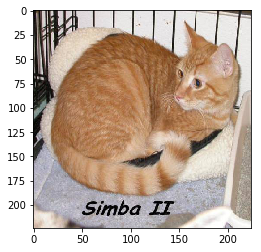

Model prediction:
	tiger_cat      	(282)	with probability 0.344
	dishwasher     	(534)	with probability 0.131
	shopping_basket	(790)	with probability 0.105
	tabby          	(281)	with probability 0.048
	hamper         	(588)	with probability 0.032
Explanation for 'tiger_cat'
Input Model Output Tensor("strided_slice_13:0", shape=(), dtype=float32)


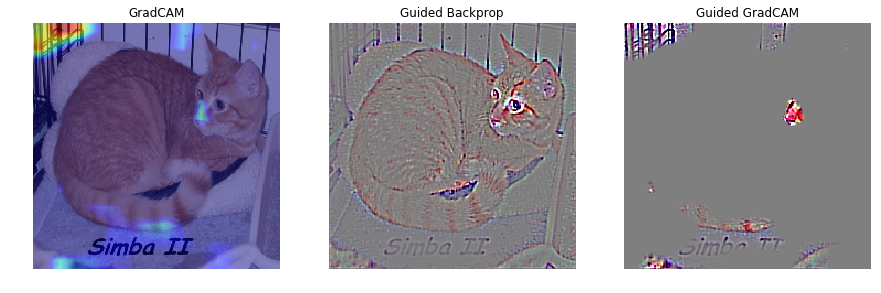

Original Image Name: ../input/train/dogs/dog.1277.jpg


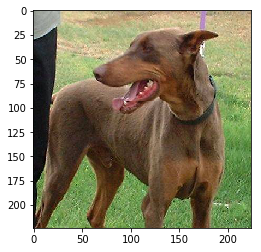

Model prediction:
	Doberman       	(236)	with probability 0.832
	kelpie         	(227)	with probability 0.067
	vizsla         	(211)	with probability 0.033
	Rhodesian_ridgeback	(159)	with probability 0.018
	Chesapeake_Bay_retriever	(209)	with probability 0.008
Explanation for 'Doberman'
Input Model Output Tensor("strided_slice_14:0", shape=(), dtype=float32)


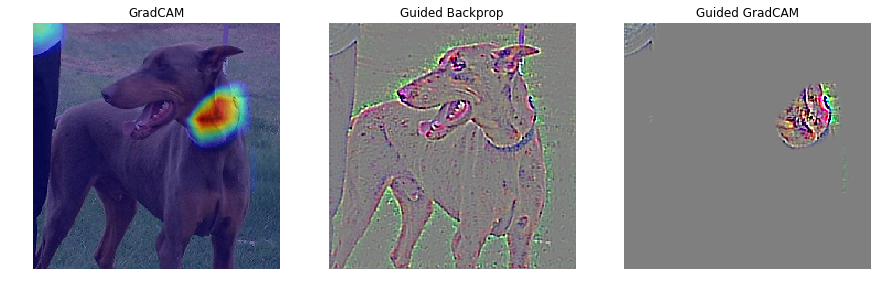

In [121]:
model = build_model()

guided_model = build_guided_model()

print("Original Image Name:",ImageName)
plt.imshow(image.load_img(ImageName, target_size=(H, W)))
plt.show()
gradcam, gb, guided_gradcam = compute_model_analysis_importance(model, guided_model, ImageName, layer_name='block5_conv3', 
                                               visualize=True, save=True)


** Here the class category decision of Cat is beint taken by important regions of Cat Nose and Tail**

In [ ]:
ImageNameRev= TRAIN_DIR_DOG + "/dog.1277.jpg"
print("Original Image Name:",ImageNameRev)
plt.imshow(image.load_img(ImageNameRev, target_size=(H, W)))
plt.show()

gradcam, gb, guided_gradcam = compute_model_analysis_importance(model, guided_model, ImageNameRev, layer_name='block5_conv3', 
                                               visualize=True, save=True)

**GRAD-CAM clearly shows that class categroy "Doberman" is mainly recognised by the pixels near the neck in the image. Guided GradCAM is multiplication of Grad-CAM" and "Guided Backpropagation" whicih also shows visually the important regions in the image to determine the class**.